In [12]:
import pyodbc
import numpy as np
import pandas as pd
from tqdm import tqdm

In [13]:
name_db = 'IndexDataBase'

data_conection = ("Driver={SQL Server};"
                 "Server=DESKTOP-0EKP870;"
                 f"Database={name_db};")
cnxn = pyodbc.connect(data_conection)

------------
**Importação dos nomes das tabelas**

In [14]:
informationsTables = f'''
SELECT * FROM INFORMATION_SCHEMA.TABLES
'''
informations_tables_df = pd.read_sql(informationsTables, cnxn)

In [15]:
display(informations_tables_df.head(3))

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,IndexDataBase,dbo,Table5117,BASE TABLE
1,IndexDataBase,dbo,Table8204,BASE TABLE
2,IndexDataBase,dbo,Table2873,BASE TABLE


---------
**Ordenando os dados referentes aos nomes**

In [16]:
names = informations_tables_df['TABLE_NAME'].tolist()

In [17]:
for i, name in enumerate(names):
    names[i] = int(name[5:])

In [18]:
names_orderned = sorted(names)
for i, name in enumerate(names_orderned):
    names_orderned[i] = 'Table'+str(name)

def values_from_matrix (matrix):
    valeus_outside_diagonal = []
    for i, dataset in enumerate(matrix):
        for j in range(i):
            valeus_outside_diagonal.append(dataset[j])
    return valeus_outside_diagonal

In [19]:
def estimate_covariance (stocks_frame):
    list_prices = []
    for i in range(len(stocks_frame)):
        list_prices.append(stocks_frame.iloc[i][:].tolist())
    matrix_prices = np.array(list_prices)
    
    cov_matrix = np.cov(matrix_prices,bias=True)
    corr_matrix = np.corrcoef(matrix_prices)
    
    mean_cov = np.mean(values_from_matrix (cov_matrix))
    mean_corr = np.mean(values_from_matrix (corr_matrix))
    return mean_cov, mean_corr

In [20]:
def values_from_matrix (matrix):
    valeus_outside_diagonal = []
    for i in range(len(matrix)):
        for j in range(i):
            valeus_outside_diagonal.append(matrix.iloc[i][j])
            
    return np.mean(valeus_outside_diagonal)

In [21]:
def estimation (stocks_frame):
    cov_matrix = stocks_frame.cov()
    corr_matrix = stocks_frame.corr(method='pearson')

    mean_cov = values_from_matrix (cov_matrix)
    mean_corr = values_from_matrix (corr_matrix)
    return mean_cov, mean_corr    

In [22]:
all_cov_mean = []
all_corr_mean = []
for name_table in tqdm(names_orderned):
    ImportTable = f'''
    SELECT * FROM {name_table}
    '''
    stocks_frame = pd.read_sql(ImportTable, cnxn)
    mean_cov, mean_corr = estimation (stocks_frame)
    all_cov_mean.append(mean_cov)
    all_corr_mean.append(mean_corr)
    

100%|██████████████████████████████████████████████████████████████████████████████| 8515/8515 [25:27<00:00,  5.57it/s]


In [23]:
df_covariance = pd.DataFrame(list(zip(all_cov_mean, all_corr_mean)), columns=['Covariance',                                                                            'Correlation'])
df_covariance.head(3)

,Covariance,Correlation
0,1796.475957,0.288998
1,1793.259437,0.289429
2,1794.121158,0.290246


In [24]:
len(df_covariance)

8515

In [25]:
df_covariance.to_excel(r'data/CovarianceCorrelationIBOV.xlsx')

In [26]:
df_covariance

,Covariance,Correlation
0,1796.475957,0.288998
1,1793.259437,0.289429
2,1794.121158,0.290246
3,1781.002458,0.293038
4,1775.698398,0.293632
...,...,...
8510,4.936401,0.148015
8511,4.997633,0.149385
8512,5.063470,0.150772
8513,5.129680,0.152362


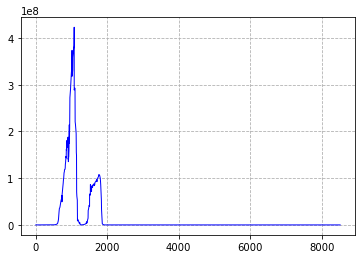

In [27]:
import matplotlib.pyplot as plt 
plt.plot(df_covariance.index, df_covariance['Covariance'], color='blue', lw=1.0)
plt.grid(linestyle='--')
plt.show()

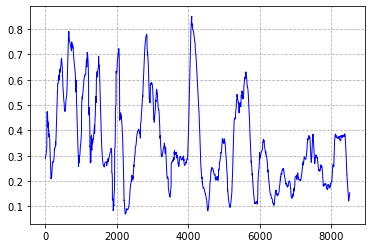

In [28]:
plt.plot(df_covariance.index, df_covariance['Correlation'], color='blue', lw=1.0)
plt.grid(linestyle='--')
plt.show()